In [1]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропуски отсутствуют

In [6]:
def get_rmse_r2 (X, y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    test_r2 = r2_score(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    return {"Test_RMSE": test_rmse, "Train_RMSE": train_rmse, "Test_R2": test_r2, "Train_R2": train_r2}

In [7]:
results_tabl = {}

In [8]:
print(df.shape)

(20640, 9)


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [11]:
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
target = ['MedHouseVal']

results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model1': results})

In [12]:
results_tabl

{'Model1': {'Test_RMSE': 0.7455813830127764,
  'Train_RMSE': 0.7196757085831574,
  'Test_R2': 0.5757877060324508,
  'Train_R2': 0.6125511913966952}}

In [13]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

<AxesSubplot: xlabel='MedHouseVal', ylabel='Count'>

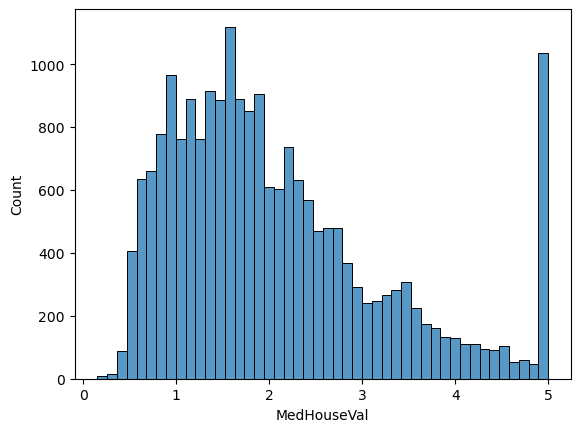

In [14]:
sns.histplot(df['MedHouseVal'])

In [15]:
df[df['MedHouseVal'] > 5 ]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


Не естественное распределение, квартир со стоимостью больше 5 млн - 992 шт, похоже на выбросы.

In [16]:
df = df[(df['MedHouseVal'] <= 5)]

<AxesSubplot: xlabel='MedHouseVal', ylabel='Count'>

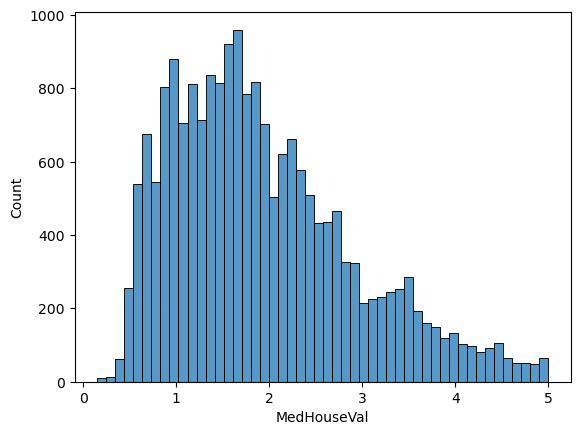

In [17]:
sns.histplot(df['MedHouseVal'])

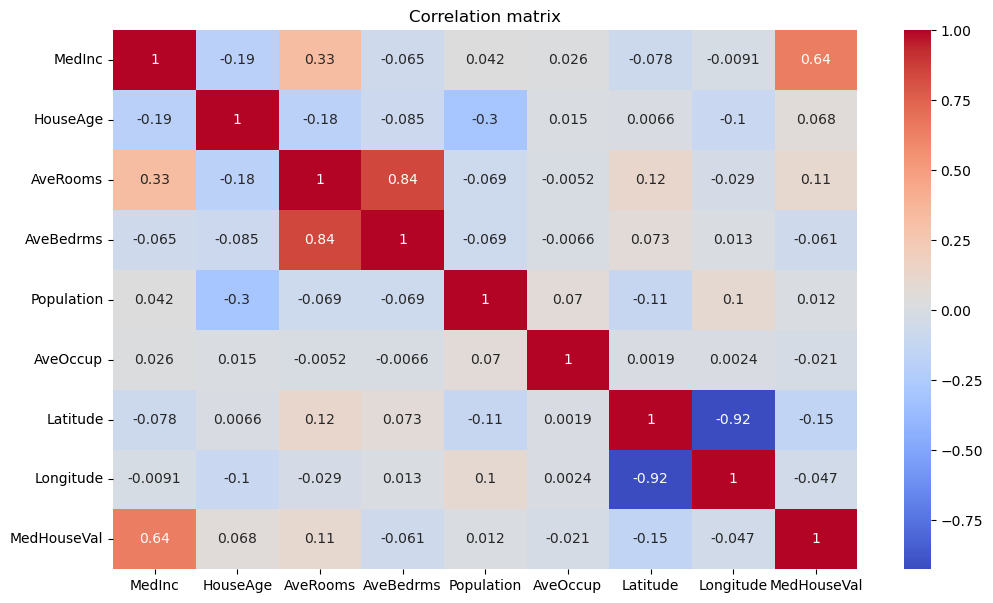

In [18]:
corr_matrix = df.corr()  # вычислить корреляционную матрицу

plt.figure(figsize=(12,7)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # нарисовать тепловую карту с аннотациями и цветовой картой
plt.title("Correlation matrix")
plt.show()

Исходя из корреляций, мы видим что признаки AveOccup и Population практически не влияют на целевой признак, самый значимый признак - это Medlnc.

In [19]:
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Latitude', 'Longitude']
target = ['MedHouseVal']

results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model2': results})

При удалении из расчетов признаки AveOccup и Population RMSE уменьшился на 9%, при этом R2 уменьшился только на 0.2%

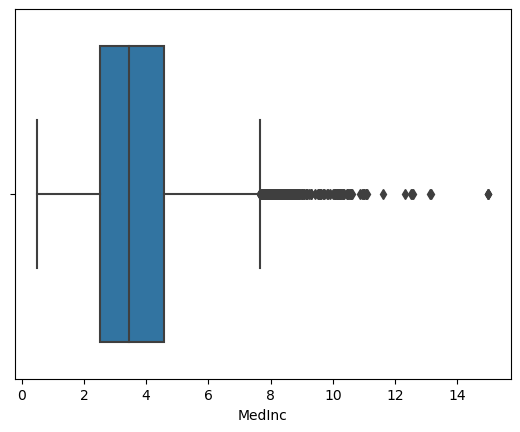

In [20]:
get_boxplot(df, columns=['MedInc'])

In [21]:
df[df['MedInc'] > 14 ]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.500
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.313
18504,15.0001,26.0,12.500000,1.250000,17.0,4.250000,37.13,-121.96,4.000


In [22]:
df = df[(df['MedInc'] < 14)] # Это значение похоже на выброс

In [23]:
results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model3': results})

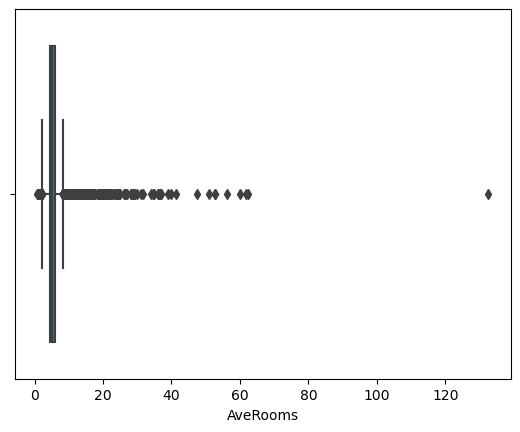

In [24]:
get_boxplot(df, columns=['AveRooms'])

In [25]:
df[df['AveRooms'] > 70 ]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1979,4.625,34.0,132.533333,34.066667,36.0,2.4,38.8,-120.08,1.625


In [26]:
df = df[(df['AveRooms'] < 70)] # Это значение похоже на выброс

In [27]:
results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model4': results})

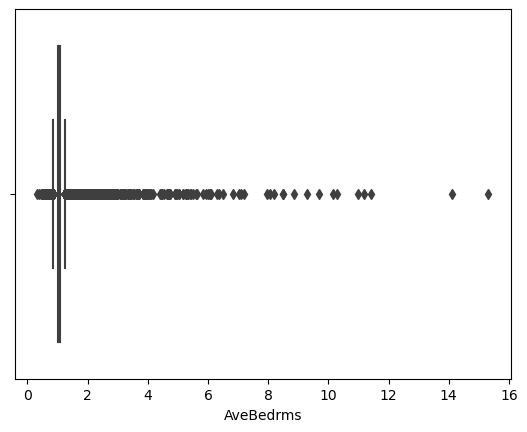

In [28]:
get_boxplot(df, columns=['AveBedrms'])

In [29]:
df[df['AveBedrms'] > 12] #Похоже на выброс, так как при таких значения стоимость не похожа на правду

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.675
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.875


In [30]:
df = df[(df['AveBedrms'] < 12)]

In [31]:
results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model5': results})

In [32]:
df['AveBedrms'] = np.log(df['AveBedrms'])

In [33]:
results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model_log': results})

In [34]:
df['HouseAge'] = np.sqrt(df['HouseAge'])

In [35]:
results = get_rmse_r2(df[cols], df[target])
results_tabl.update({'Model_sqr': results})

In [36]:
for model, metrics in results_tabl.items():
    print(f"{model}: {metrics}")

Model1: {'Test_RMSE': 0.7455813830127764, 'Train_RMSE': 0.7196757085831574, 'Test_R2': 0.5757877060324508, 'Train_R2': 0.6125511913966952}
Model2: {'Test_RMSE': 0.6519436985803682, 'Train_RMSE': 0.6391579119115753, 'Test_R2': 0.5737326338765143, 'Train_R2': 0.5672729887472665}
Model3: {'Test_RMSE': 0.6521178065134818, 'Train_RMSE': 0.637060697079956, 'Test_R2': 0.5553476923728401, 'Train_R2': 0.5745721601741174}
Model4: {'Test_RMSE': 0.6490698206321791, 'Train_RMSE': 0.6352939135447677, 'Test_R2': 0.5640587003606852, 'Train_R2': 0.5758574780771124}
Model5: {'Test_RMSE': 0.6454033605061054, 'Train_RMSE': 0.6355081334865768, 'Test_R2': 0.5695643621949085, 'Train_R2': 0.5754017361624882}
Model_log: {'Test_RMSE': 0.6446104499428791, 'Train_RMSE': 0.6340825525615366, 'Test_R2': 0.5706213362815469, 'Train_R2': 0.5773045293636514}
Model_sqr: {'Test_RMSE': 0.6449365997932677, 'Train_RMSE': 0.6347862349121955, 'Test_R2': 0.5701867258435254, 'Train_R2': 0.5763658238678784}


Проделанная работа:
 - изучили данные по основным параметрам;
 - изучив значения целевого признака, выявили выбросы и удалили их;
 - построили корреляционную матрицу, убрав несколько признаков с минимальными влияниями на целевой признак;
 - изучил на предмет выбрасов, оставшиеся признаки и удалив их
 - при каждом шаге фиксировал test/train значения RMSE и R2
 - пролагорифмиривал AveBedrms 
 - извлек корень квадратный HouseAge

Выводы:
 - Каждым проделанным действием (кроме последнего) удавалось улучшить показатели и максимально приблизить работу модели, по тестовой и треннировочной выборке.
 - модель работает не идеально, можно еще поэкспересентаровать)

In [38]:
from sklearn.preprocessing import StandardScaler


def get_score(X,y, random_seed=42, model=None):
  if model is None:
      model = LinearRegression()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)


  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [39]:
get_score(df[cols], df[target])

0.5701867258435253